In [76]:
import os
import pandas as pd
import transcriptomic as tx
from tqdm import tqdm

In [77]:
basedir = 'data/test/cross_species/v3/'
param_ids = [394, 984]
n_latent_spaces = 100

run = False
if run:
    for param_id in param_ids:

        print('Param ID: {}'.format(param_id))

        pipeline_dir = os.path.join(basedir, str(param_id), 'similarity')
        input_file = os.path.join(pipeline_dir, 'centroid_pairs.csv')

        kwargs = dict(
            species = ['human', 'mouse'],
            expr = ['data/human/expression', 'data/mouse/expression'],
            masks = ['data/human/registration/v3/reference_files/mask_0.8mm.mnc', 'data/mouse/atlas/coronal_200um_coverage_bin0.8.mnc'],
            microarray_coords = 'data/human/expression/v3/AHBA_microarray_coordinates_study.csv',
            gene_space = 'latent-space',
            metric = 'correlation',
            signed = True,
            threshold = 'top_n',
            threshold_value = 0.2,
            threshold_symmetric = True,
            return_signed = True,
            verbose = False
        )

        # Import image pairs
        df_imgs = pd.read_csv(input_file)
        imgs = df_imgs.values.tolist()
        imgs = [tuple(x) for x in imgs]
        imgs = [x for x in imgs if 'nk_2_k_1' in x[0] and 'nk_2_k_1' in x[1]]
        kwargs['imgs'] = imgs


        results = []
        for l in range(1, n_latent_spaces+1):
            print('On latent space: {}'.format(l))
            kwargs['latent_space_id'] = l
            sim = tx.transcriptomic_similarity(**kwargs)
            sim['latent_space'] = l
            results.append(sim)
        results = pd.concat(results)

        output_file = 'similarity_latent_spaces.csv'
        output_file = os.path.join(pipeline_dir, output_file)
        results.to_csv(output_file, index = False)
        print('\n')

In [3]:
# from functools import partial
# import multiprocessing as mp

# n_latent_spaces = 50
# latent_spaces = range(1, n_latent_spaces+1)

# iterator = partial(tx.transcriptomic_similarity, **kwargs)
# iterator

# pool = mp.Pool(8)
# results = []
# for x in tqdm(pool.imap(iterator, latent_spaces), total = n_latent_spaces):
#     results.append(x)
# pool.close()
# pool.join()

In [78]:
param_ids
basedir

files = [os.path.join(basedir, str(id), 'similarity', 'similarity_latent_spaces.csv') for id in param_ids]
files_avg = [os.path.join(basedir, str(id), 'similarity', 'similarity.csv') for id in param_ids]

file = files[0]
file_avg = files_avg[0]
x = pd.read_csv(file)
x_avg = pd.read_csv(file_avg)

In [79]:
ind_1 = x_avg['img1'].str.contains('nk_2_k_1')
ind_2 = x_avg['img2'].str.contains('nk_2_k_1')
ind = ind_1 & ind_2
x_avg = x_avg.loc[ind]
x_avg.loc[x_avg['img1'].str.contains('absolute')]

,img1,img2,similarity
4793,data/human/derivatives/v3/013/centroids/resolu...,data/mouse/derivatives/v3/107/centroids/resolu...,0.39766


In [80]:
x_abs = x.loc[x['img1'].str.contains('absolute')]
x_rel = x.loc[x['img1'].str.contains('relative')]

In [81]:
import matplotlib.pyplot as plt
import numpy as np

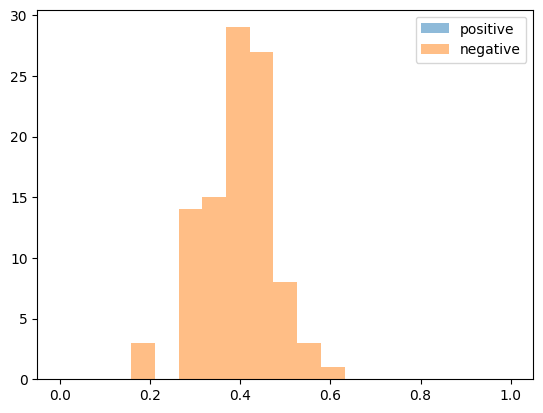

In [84]:
nbins = 20
bins = np.linspace(0, 1, nbins)
plt.hist(x_abs['similarity_pos'], bins, alpha = 0.5, label = 'positive')
plt.hist(x_abs['similarity_neg'], bins, alpha = 0.5, label = 'negative')
plt.legend()
plt.show()

In [83]:
print(x_abs['similarity_pos'].mean())
print(x_abs['similarity_neg'].mean())

nan
0.3976603996209417


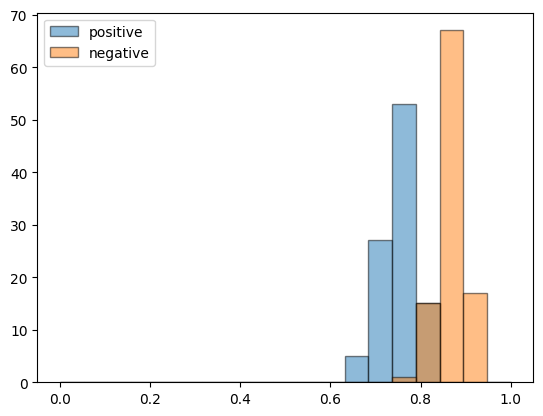

In [41]:
nbins = 20
bins = np.linspace(0, 1, nbins)
plt.hist(x_rel['similarity_pos'], bins, alpha = 0.5, label = 'positive', edgecolor = 'black')
plt.hist(x_rel['similarity_neg'], bins, alpha = 0.5, label = 'negative', edgecolor = 'black')
plt.legend()
plt.show()

0.5678454717703323
0.7404784999652617
